In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Cargar el dataset
file_path = 'https://raw.githubusercontent.com/raj4rachit/Assignment_1_DS250723_Python/main/Machine_learning/data/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv'
data = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset y la información general
data_head = data.head()
data_info = data.info()
data_describe = data.describe()

(data_head, data_info, data_describe)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

(   YearStart  YearEnd LocationAbbr LocationDesc  \
 0       2011     2011           AL      Alabama   
 1       2011     2011           AL      Alabama   
 2       2011     2011           AL      Alabama   
 3       2011     2011           AL      Alabama   
 4       2011     2011           AL      Alabama   
 
                                    Datasource                    Class  \
 0  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
 1  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
 2  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
 3  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
 4  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
 
                      Topic                                           Question  \
 0  Obesity / Weight Status  Percent of adults aged 18 years and older who ...   
 1  Obesity / Weight Status  Percent of adults aged 18 years and older

In [3]:
# Conteo de valores nulos en columnas relevantes
null_counts = data[['Data_Value', 'Education', 'Income']].isnull().sum()

# Porcentaje de datos nulos
null_percentage = (null_counts / len(data)) * 100

(null_counts, null_percentage)


(Data_Value     5046
 Education     45764
 Income        40043
 dtype: int64,
 Data_Value     9.450854
 Education     85.713215
 Income        74.998127
 dtype: float64)

In [4]:
# Filtrado de datos: Mantener solo las filas donde "Data_Value", "Education" e "Income" no son nulos
data_complete = data.dropna(subset=['Data_Value', 'Education', 'Income'])

In [5]:
# Inspeccionar valores únicos en 'Education' e 'Income'
unique_education = data_complete['Education'].unique()
unique_income = data_complete['Income'].unique()

# Verificar tipos de datos de 'Education' e 'Income'
dtype_education = data_complete['Education'].dtype
dtype_income = data_complete['Income'].dtype

(unique_education, dtype_education, unique_income, dtype_income)


(array([], dtype=object), dtype('O'), array([], dtype=object), dtype('O'))

No puedo utilizar Education e Income. Hay que coger otro camino

In [6]:
# Conteo de valores no nulos y valores únicos para cada columna
non_null_counts = data.notnull().sum()
unique_counts = data.nunique()

# Crear un DataFrame para visualizar la información
variable_info = pd.DataFrame({
    'non_null_counts': non_null_counts,
    'unique_counts': unique_counts
})

# Filtrar las variables con más del 70% de valores no nulos y al menos 2 valores únicos (para evitar constantes)
potential_predictors = variable_info[(variable_info['non_null_counts'] > 0.7 * len(data)) & (variable_info['unique_counts'] > 1)]

# Mostrar las variables potenciales para la predicción
potential_predictors.sort_values(by='non_null_counts', ascending=False)


,non_null_counts,unique_counts
YearStart,53392,6
YearEnd,53392,6
StratificationCategoryId1,53392,6
Stratification1,53392,28
StratificationCategory1,53392,6
LocationID,53392,55
QuestionID,53392,9
TopicID,53392,3
ClassID,53392,3
StratificationID1,53392,28


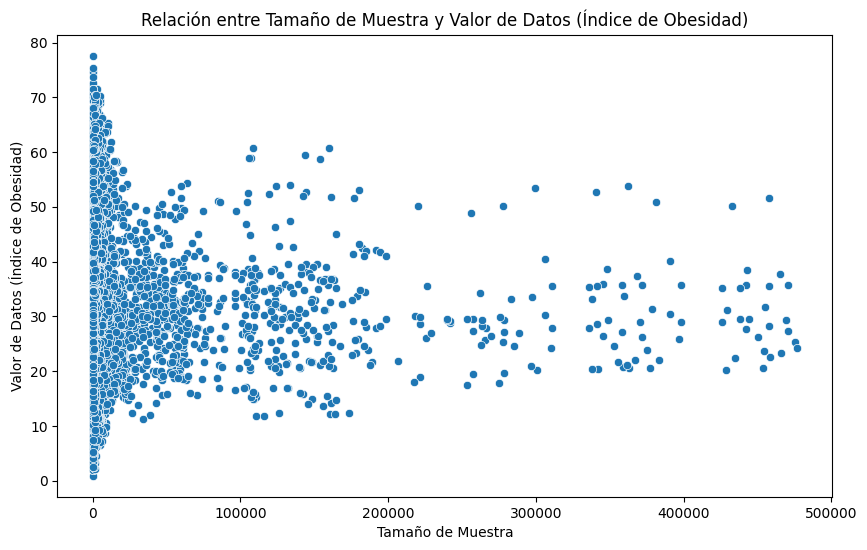

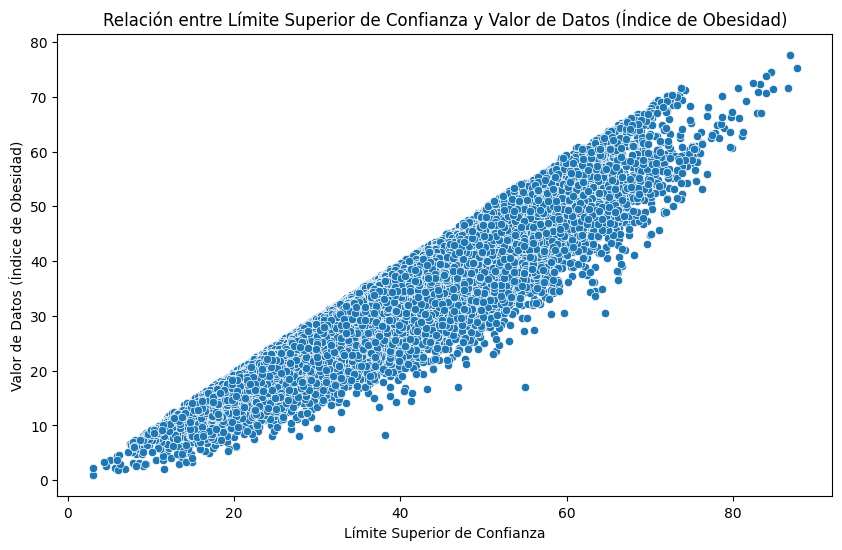

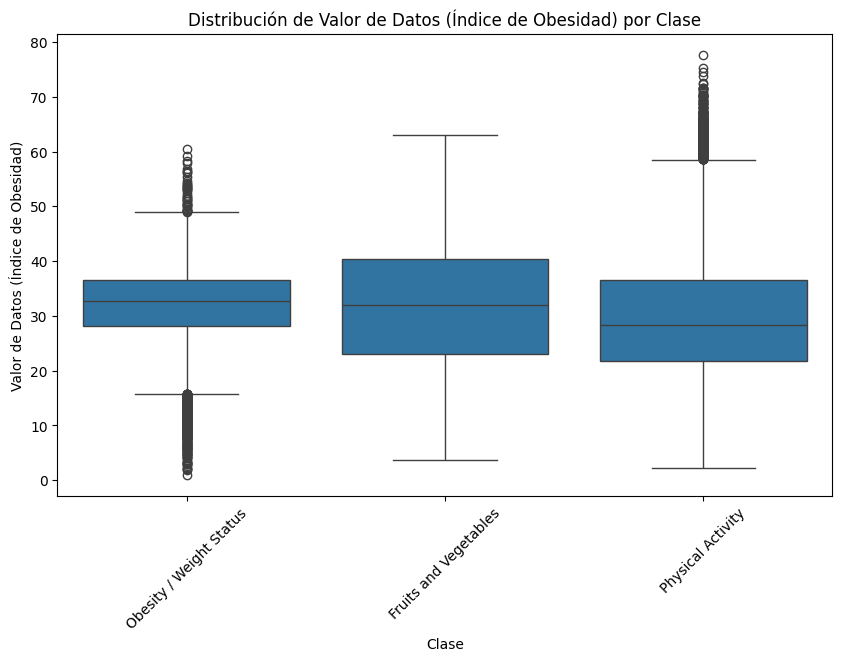

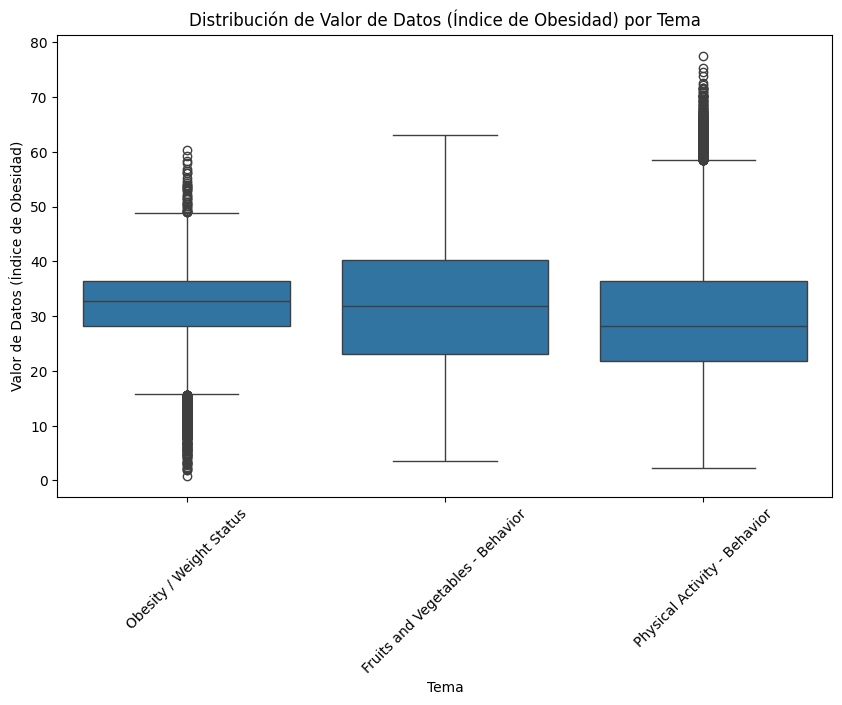

In [7]:
# Visualizar la relación entre "Sample_Size" y "Data_Value"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sample_Size', y='Data_Value', data=data)
plt.title('Relación entre Tamaño de Muestra y Valor de Datos (Índice de Obesidad)')
plt.xlabel('Tamaño de Muestra')
plt.ylabel('Valor de Datos (Índice de Obesidad)')
plt.show()

# Visualizar la relación entre "High_Confidence_Limit" y "Data_Value"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='High_Confidence_Limit ', y='Data_Value', data=data)
plt.title('Relación entre Límite Superior de Confianza y Valor de Datos (Índice de Obesidad)')
plt.xlabel('Límite Superior de Confianza')
plt.ylabel('Valor de Datos (Índice de Obesidad)')
plt.show()

# Visualizar la distribución de "Data_Value" por "Class"
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Data_Value', data=data)
plt.xticks(rotation=45)
plt.title('Distribución de Valor de Datos (Índice de Obesidad) por Clase')
plt.xlabel('Clase')
plt.ylabel('Valor de Datos (Índice de Obesidad)')
plt.show()

# Visualizar la distribución de "Data_Value" por "Topic"
plt.figure(figsize=(10, 6))
sns.boxplot(x='Topic', y='Data_Value', data=data)
plt.xticks(rotation=45)
plt.title('Distribución de Valor de Datos (Índice de Obesidad) por Tema')
plt.xlabel('Tema')
plt.ylabel('Valor de Datos (Índice de Obesidad)')
plt.show()


1. Preprocesamiento de Datos

    Codificar las variables categóricas ("Class" y "Topic").
    
    Normalizar las variables numéricas ("Low_Confidence_Limit" y "Sample_Size").
    
    Dividir los datos en conjuntos de entrenamiento y prueba.

2. Construcción del Modelo de Regresión Lineal Múltiple

    Entrenar el modelo utilizando TensorFlow.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Variables seleccionadas
num_vars = ['Low_Confidence_Limit', 'Sample_Size']
cat_vars = ['Class', 'Topic']

# Eliminar filas con valores nulos en 'Data_Value'
data_model = data.dropna(subset=['Data_Value'])

# División de datos en conjuntos de entrenamiento y prueba
X = data_model[num_vars + cat_vars]
y = data_model['Data_Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear transformadores para variables numéricas y categóricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputación de valores nulos
    ('scaler', StandardScaler())  # Normalización
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputación de valores nulos
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codificación one-hot
])

# Combinar transformadores en un preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_vars),
        ('cat', categorical_transformer, cat_vars)
    ])

# Definir el modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir los valores de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

(mae, mse, r2)


(2.0375408168611178, 8.649843991220857, 0.9186336810326554)

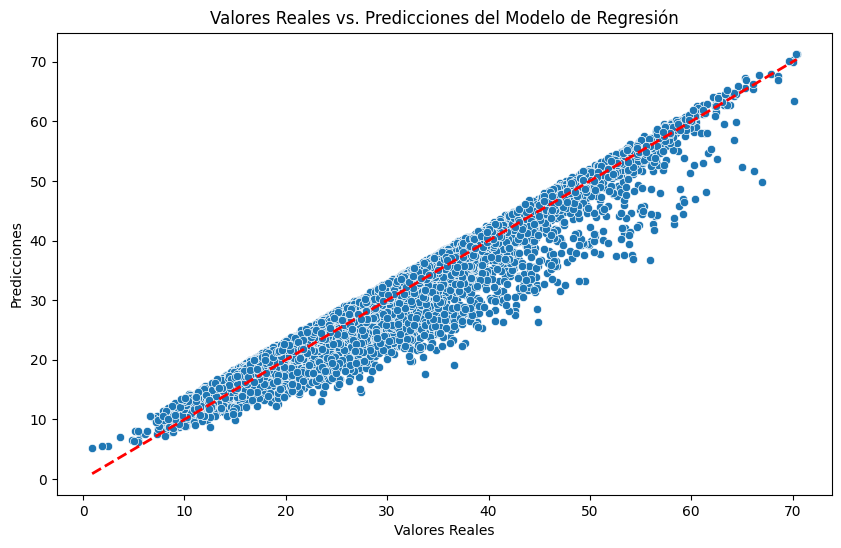

In [9]:
# Visualizar las predicciones vs. valores reales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones del Modelo de Regresión')
plt.show()


# With Tensorflow

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Preprocesamiento de datos específico para TensorFlow
# Usaremos el preprocesador definido previamente para transformar los datos
X_train_preprocessed = preprocessor.transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Construcción del modelo con TensorFlow/Keras
model_tf = models.Sequential([
    layers.Dense(1, input_dim=X_train_preprocessed.shape[1])
])

# Compilación del modelo
model_tf.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamiento del modelo
history = model_tf.fit(
    X_train_preprocessed, y_train,
    epochs=50,
    validation_split=0.2,  # Usar un subconjunto del conjunto de entrenamiento para la validación
    verbose=0  # No imprimir detalle de cada época
)

# Predecir los valores de prueba
y_pred_tf = model_tf.predict(X_test_preprocessed).flatten()

# Evaluar el modelo
mae_tf = mean_absolute_error(y_test, y_pred_tf)
mse_tf = mean_squared_error(y_test, y_pred_tf)
r2_tf = r2_score(y_test, y_pred_tf)

# Métricas de evaluación y gráfica de la pérdida durante el entrenamiento
(mae_tf, mse_tf, r2_tf), history.history['loss'][-1], history.history['val_loss'][-1]


303/303 [==============================] - 0s 1ms/step


((2.0425966119421055, 8.64989818441859, 0.918633171254558),
 8.652592658996582,
 8.448892593383789)

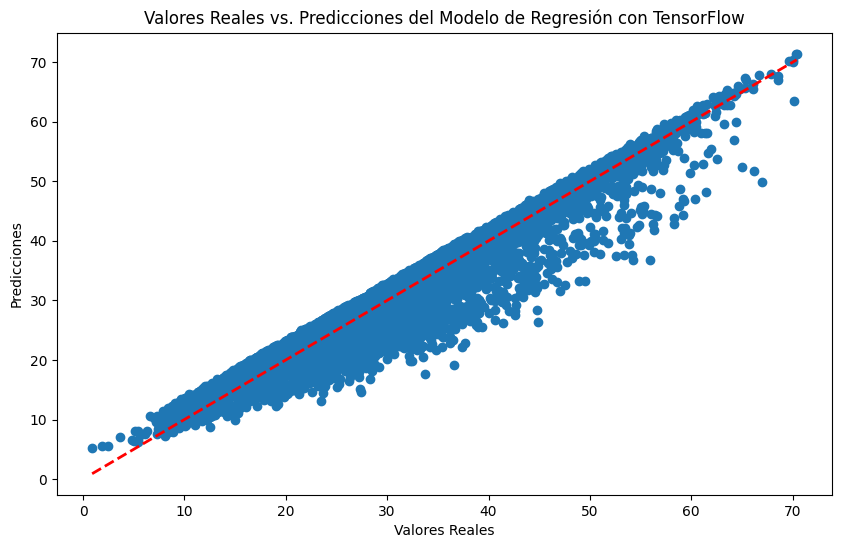

In [11]:
# Visualizar las predicciones vs. valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones del Modelo de Regresión con TensorFlow')
plt.show()